In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

from pathlib import Path
import numpy as np
from numpy.random import choice, normal
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

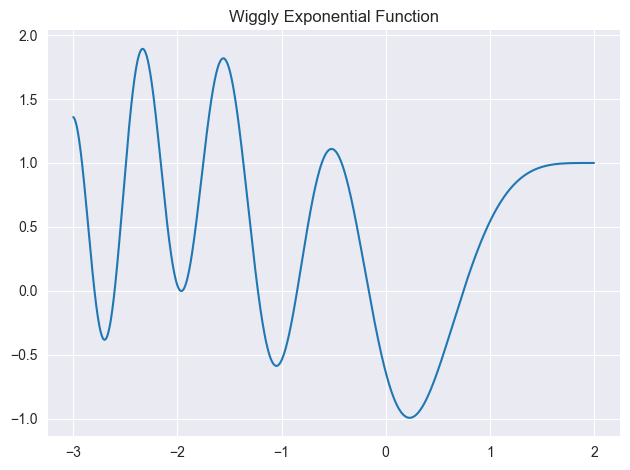

In [3]:
def f(x):
    return np.exp(-(x+2) ** 2) + np.cos((x-2)**2)

x = np.linspace(-3, 2, 1000)
y = pd.Series(f(x), index=x)
y.plot(title='Wiggly Exponential Function')
sns.despine()
plt.tight_layout();

In [6]:
test_size = 500
train_size = 250
reps = 100

noise = .5
noise = y.std() * noise
X_test = choice(x, size=test_size, replace=False)

max_depth = 10
n_estimators = 10

tree = DecisionTreeRegressor(max_depth=max_depth)
bagged_tree = BaggingRegressor(base_estimator=tree, n_estimators=n_estimators)
learners = {'Decision Tree': tree, 'Bagging Regressor': bagged_tree}
predictions = {k: pd.DataFrame() for k, v in learners.items()}

In [7]:
learners.items()

dict_items([('Decision Tree', DecisionTreeRegressor(max_depth=10)), ('Bagging Regressor', BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10)))])

In [8]:
for i in range(reps):
    X_train = choice(x, train_size)
    y_train = f(X_train) + normal(scale=noise, size=train_size)
    for label, learner in learners.items():
        learner.fit(X=X_train.reshape(-1, 1), y=y_train)
        preds = pd.DataFrame({i: learner.predict(X_test.reshape(-1, 1))},index=X_test)
        predictions[label] = pd.concat([predictions[label], preds], axis=1)

In [9]:
y_true = pd.Series(f(X_test), index=X_test)
y_test = pd.DataFrame(y_true.values.reshape(-1, 1)+normal(scale=noise, size=(test_size, reps)), index=X_test)

In [10]:
y_true

-0.012012   -0.597212
-0.197197    0.153802
 1.299299    0.881889
 0.833834    0.209619
-2.674675   -0.356085
               ...   
-2.634635   -0.203632
-0.267267    0.464823
-1.728729    1.160680
-2.024024    0.114658
-2.669670   -0.344262
Length: 500, dtype: float64

In [11]:
y_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
-0.012012,-0.499564,-0.639722,-0.773773,-0.723272,-1.166135,-0.060085,-0.610925,-0.578075,-0.294506,-1.354814,...,-0.885716,-0.390245,-0.105284,-0.158659,-0.564529,-0.689066,-0.240619,-0.600456,-0.664197,-1.153908
-0.197197,0.571083,0.103334,0.131049,0.595569,0.128944,0.290569,-0.114687,0.242557,0.418986,0.010128,...,-0.488753,0.085304,0.201860,0.302230,0.414353,-0.346277,-0.038315,-0.127121,-0.615158,-0.042143
1.299299,0.487973,0.934684,1.815532,1.014937,1.080385,0.970519,1.074756,0.695307,1.142538,1.306523,...,1.333406,0.338171,0.957424,0.251005,0.530193,0.806217,0.495139,1.417495,0.324292,0.619400
0.833834,0.617978,0.480881,0.585632,-0.724021,0.001898,-0.307119,-0.351252,-0.233490,0.160496,0.131497,...,-0.556747,0.602433,0.179393,0.644019,0.749305,0.453806,-0.152535,0.312248,0.193772,0.490625
-2.674675,0.142052,-0.288776,-0.249439,-0.808895,-1.098837,-0.356583,0.279064,-0.241954,0.390668,-0.332214,...,0.005397,-0.543510,-0.785378,0.219163,-0.351407,-0.927584,0.052809,-0.178732,-0.187045,-0.378801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-2.634635,-0.271890,-0.330229,-0.192392,0.371634,-0.419058,-0.698826,-0.069277,0.257843,0.079514,-0.369278,...,-0.793925,-1.024848,0.095203,-0.473442,-0.353778,-0.262508,0.253396,0.065991,-0.023620,0.095603
-0.267267,0.251414,-0.235535,0.601241,0.515797,0.810675,0.817786,0.688903,0.283999,1.011580,0.619729,...,0.283945,0.446461,0.542129,0.214421,0.744684,1.136982,0.164440,0.130870,0.589555,0.778671
-1.728729,1.035658,1.208353,1.277929,1.714343,1.065997,1.028408,0.995016,1.180739,1.782552,1.136594,...,0.981295,0.781448,1.478841,1.072355,1.331549,1.093516,1.574677,0.296752,0.671196,1.819183
-2.024024,0.419015,-0.137947,0.787117,0.139651,-0.036283,1.434202,0.250322,0.541587,0.405229,0.042318,...,-0.223764,0.124980,0.108926,0.503995,-0.259177,0.039517,-0.515845,0.037630,0.599548,-0.711458


In [12]:
predictions

{'Decision Tree':                  0         1         2         3         4         5   \
 -0.012012  0.056351 -0.644261 -0.191119 -0.489105 -0.529971 -0.774380   
 -0.197197  0.329895 -0.267992  1.061325 -0.237216 -0.781239  0.512611   
  1.299299  1.558215  1.215088  0.877979  0.844755  0.687225  0.408007   
  0.833834 -0.077982  0.614501  0.322768  0.318024  0.013083  0.008120   
 -2.674675 -0.755960 -0.595605 -0.330161 -0.477813 -1.068615  0.111517   
 ...             ...       ...       ...       ...       ...       ...   
 -2.634635 -0.404436  0.204000  0.003656 -0.384455 -0.132541 -0.553585   
 -0.267267  0.543586  0.035098  0.200830  1.407793  0.454517  0.871309   
 -1.728729  0.964548  0.941446  1.246411  0.909254  0.532176  1.653284   
 -2.024024  0.590148  0.211256 -0.128174  0.607759  0.348254 -0.021973   
 -2.669670 -0.755960 -0.595605 -0.669549 -0.177213 -0.426250 -0.297724   
 
                  6         7         8         9   ...        90        91  \
 -0.012012 -1.

In [13]:
result = pd.DataFrame()
for label, preds in predictions.items():
    result[(label, 'error')] = preds.sub(y_test, axis=0).pow(2).mean(1)    # mean squared error
    result[(label, 'bias')] = y_true.sub(preds.mean(axis=1), axis=0).pow(2)             # bias
    result[(label, 'variance')] = preds.var(axis=1)
    result[(label, 'noise', )] = y_test.var(axis=1)
result.columns = pd.MultiIndex.from_tuples(result.columns)

In [14]:
result

Decision Tree                               Bagging Regressor  \
                  error      bias  variance     noise             error   
-0.012012      0.267926  0.000062  0.127646  0.131888          0.212664   
-0.197197      0.266130  0.004428  0.137347  0.116099          0.208251   
 1.299299      0.318833  0.002763  0.098772  0.208993          0.281266   
 0.833834      0.318424  0.010136  0.187899  0.150971          0.225815   
-2.674675      0.250735  0.000378  0.118674  0.154011          0.214853   
...                 ...       ...       ...       ...               ...   
-2.634635      0.273309  0.002652  0.124458  0.126712          0.192113   
-0.267267      0.252151  0.000007  0.116860  0.165459          0.185432   
-1.728729      0.313868  0.000073  0.176719  0.151285          0.238345   
-2.024024      0.293844  0.001205  0.118011  0.194324          0.229047   
-2.669670      0.266340  0.000075  0.116734  0.144620          0.201433   

                                         
               bias  variance     noise  
-0.012012  0.000114  0.077169  0.131888  
-0.197197  0.001228  0.085472  0.116099  
 1.299299  0.001968  0.054159  0.208993  
 0.833834  0.005343  0.097278  0.150971  
-2.674675  0.000012  0.067304  0.154011  
...             ...       ...       ...  
-2.634635  0.000512  0.059717  0.126712  
-0.267267  0.000285  0.058922  0.165459  
-1.728729  0.000030  0.102817  0.151285  
-2.024024  0.001512  0.050251  0.194324  
-2.669670  0.000444  0.067215  0.144620  

[500 rows x 8 columns]

In [15]:
df = result.mean().sort_index().loc['Decision Tree']
f"{(df.error- df.drop('error').sum()) / df.error:.2%}"

'-0.28%'

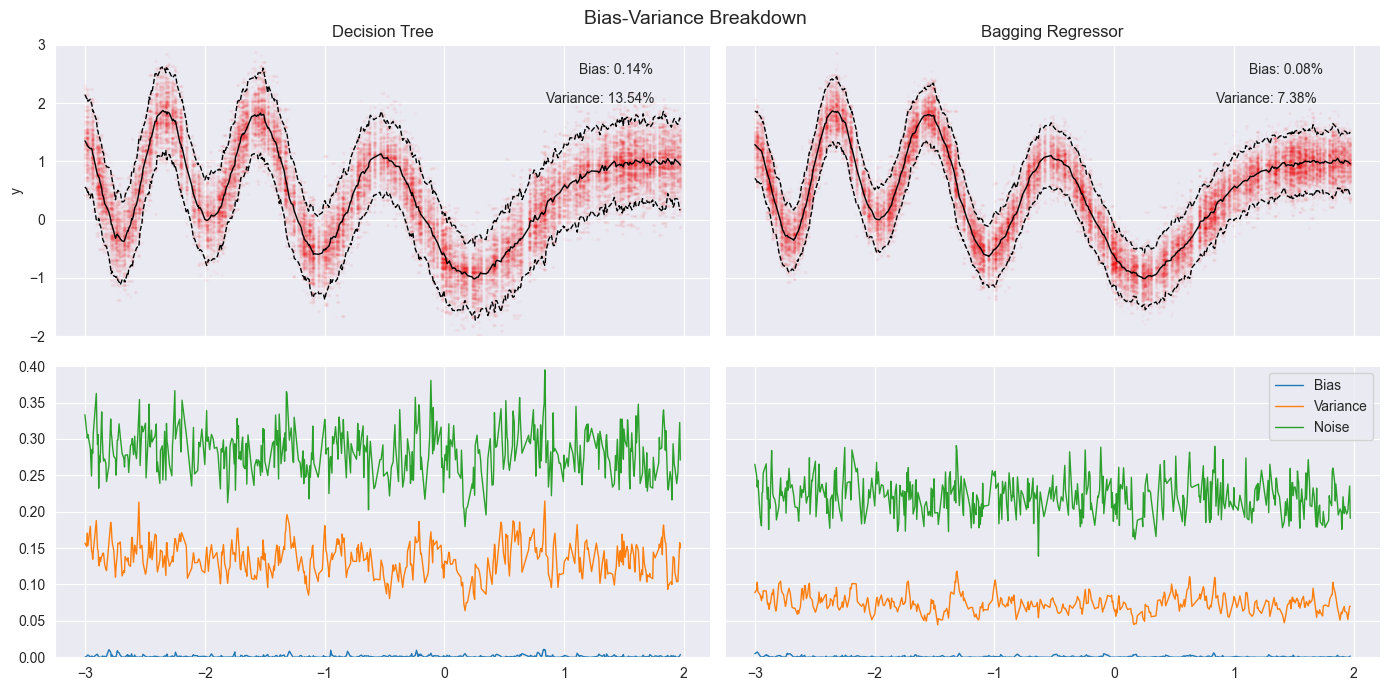

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(14, 7), sharex=True, sharey='row')
axes = axes.flatten()
idx = pd.IndexSlice

for i, (model, data) in enumerate(predictions.items()):
    mean, std = data.mean(1), data.std(1).mul(2)
    (pd.DataFrame([mean.sub(std), mean, mean.add(std)]).T
     .sort_index()
     .plot(style=['k--', 'k-', 'k--'], ax=axes[i], lw=1, legend=False, ylim=(-2, 3)))
    (data.stack().reset_index()
     .rename(columns={'level_0': 'x', 0: 'y'})
     .plot.scatter(x='x', y='y', ax=axes[i], alpha=.02, s=2, color='r', title=model))
    r = result[model]
    m = r.mean()
    kwargs = {'transform': axes[i].transAxes, 'fontsize':10}
    axes[i].text(x=.8, y=.9, s=f'Bias: {m.bias:.2%}', **kwargs)
    axes[i].text(x=.75, y=.8, s=f'Variance: {m.variance:.2%}', **kwargs)

    (r.drop('error', axis=1).sort_index()
     .rename(columns=str.capitalize)
     .plot(ax=axes[i+2], lw=1, legend=False, stacked=True, ylim=(0, .4)))

axes[-1].legend(fontsize=10)
fig.suptitle('Bias-Variance Breakdown', fontsize=14)
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.93);